In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Flatten, Dense, Dropout, Activation , Input
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model
from tensorflow.keras.applications import VGG16

import numpy as np
import os
import matplotlib.pyplot as plt
from PIL import Image

import warnings 
warnings.filterwarnings("ignore")
%matplotlib inline

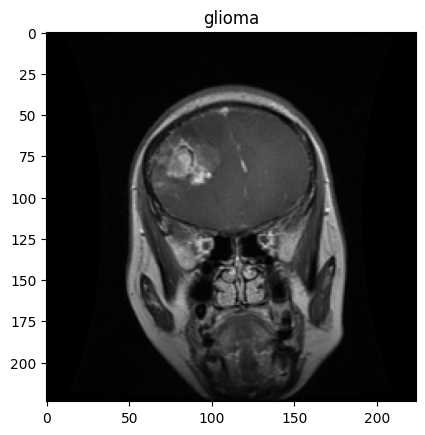

In [12]:
# Load image
img_path = '/kaggle/input/brain-tumor-mri-dataset/Training/glioma/Tr-glTr_0000.jpg'

img = Image.open(img_path)
img = img.resize((224, 224))  # Resize to consistent size

# Display image
plt.imshow(img)
plt.title("glioma")
plt.axis('off')  # Hide axis
plt.show()

In [2]:
train_datasets = "/kaggle/input/brain-tumor-mri-dataset/Training"
validation_datasets = "/kaggle/input/brain-tumor-mri-dataset/Testing"

In [4]:
def prepare_the_datasets(train_datasets, validation_datasets, batch_size, image_size):

    #In the brightness_range,If the random value is less than 1.0, the image becomes darker otherwise brighter.
    train_datasets_generator = ImageDataGenerator(rescale=1.0/255,
                                                  brightness_range=(0.8, 1.2))


    validation_datasets_generator = ImageDataGenerator(rescale=1.0/255)


    train_datasets_generator_data = train_datasets_generator.flow_from_directory(
        batch_size = batch_size,
        directory = train_datasets,
        shuffle = True,
        target_size = (image_size, image_size),
        class_mode = "categorical"
    )

    validation_datasets_generator_data = validation_datasets_generator.flow_from_directory(
        batch_size = batch_size,
        directory = validation_datasets,
        shuffle = True,
        target_size = (image_size, image_size),
        class_mode = "categorical" #One-Hot-Encoded
    )


    return train_datasets_generator_data, validation_datasets_generator_data

In [5]:
batch_size = 64
image_size = 224
train_data , validation_data = prepare_the_datasets(train_datasets, validation_datasets, batch_size, image_size)

Found 5712 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


In [6]:
# Load pre-trained VGG16 model without the top layers (include_top=False) 
conv_base = VGG16(input_shape=(224, 224, 3), include_top=False, weights='imagenet')

# Freeze the pre-trained layers to prevent training (transfer learning without fine-tuning) ❄️
conv_base.trainable = False

# Build a new model on top of the pre-trained base 🧱
model = Sequential()

# Add the pre-trained VGG16 base model
model.add(conv_base)

# Flatten the output for fully connected layers
model.add(Flatten())

# Add a dense layer with ReLU activation
model.add(Dense(256, activation='relu'))

# Add output layer with softmax activation for 4 classes
model.add(Dense(4, activation='softmax'))

# Compile the model with Adam optimizer and categorical crossentropy loss 🛠️
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [7]:
# Parameters
steps = int(train_data.samples / batch_size)  # Steps per epoch
epochs = 10

# Train the model
history = model.fit(train_data, validation_data = validation_data ,
                    epochs=epochs, steps_per_epoch=steps)

Epoch 1/10
75/89 ━━━━━━━━━━━━━━━━━━━━ 9s 675ms/step - accuracy: 0.6128 - loss: 2.0119 

KeyboardInterrupt: 

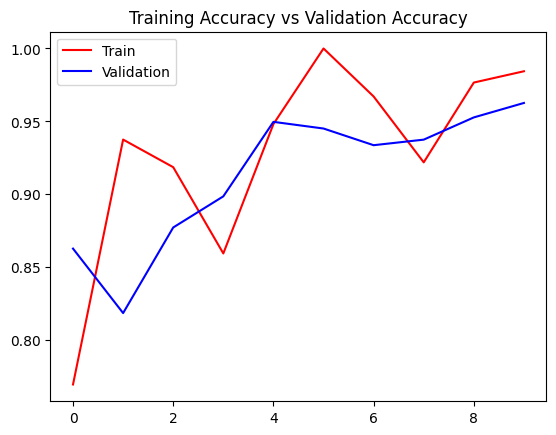

In [11]:
# Plotting the graph of Accuracy and Validation Accuracy
plt.title('Training Accuracy vs Validation Accuracy')

plt.plot(history.history['accuracy'], color='red',label='Train')
plt.plot(history.history['val_accuracy'], color='blue',label='Validation')

plt.legend()

In [ ]:
# Plotting the graph of Accuracy and Validation Accuracy
plt.title('Training Accuracy vs Validation Accuracy')

plt.plot(history.history['accuracy'], color='red',label='Train')
plt.plot(history.history['val_accuracy'], color='blue',label='Validation')

plt.legend()